In [1]:
# HTML prettify

from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click to toggle on/off the raw code.">
</form>''')

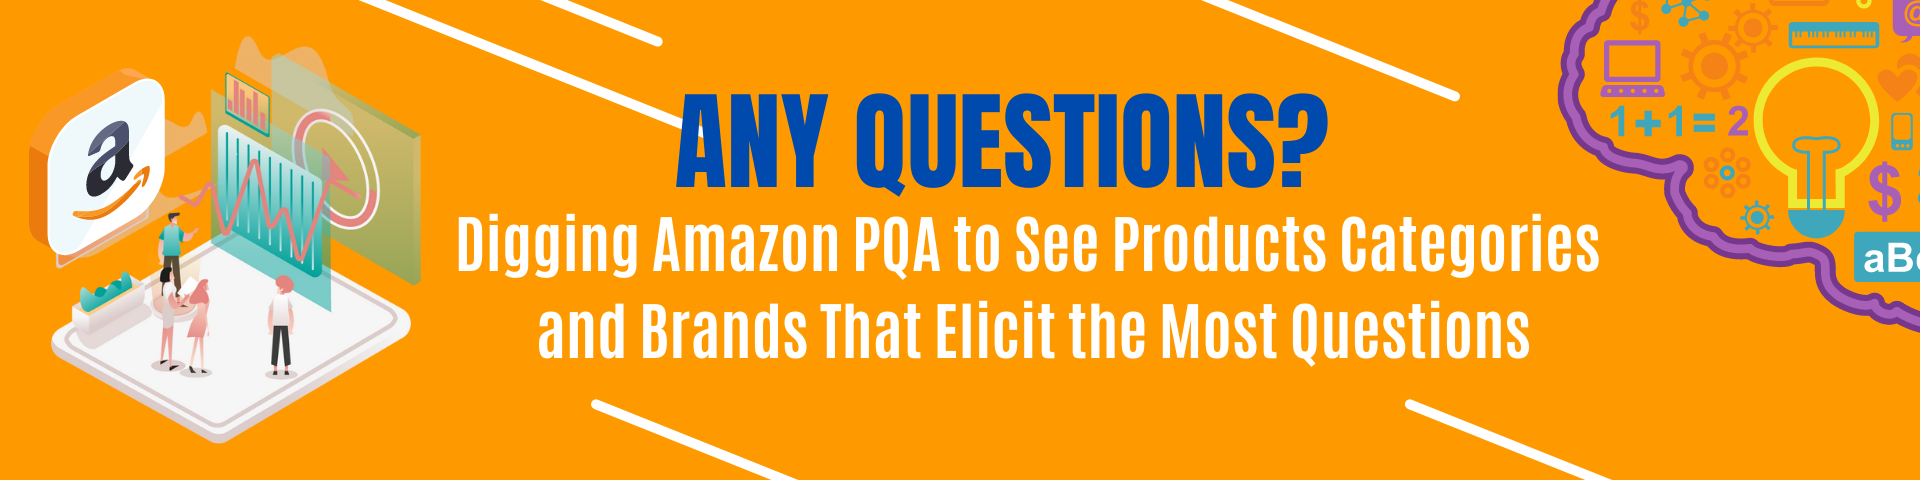

# <span style="background-color: #FF9900; color: #000000"> Executive Summary </span>

**Background**

Amazon Product Question and Answer (PQA) database contains questions of customers and answers of sellers on listed products in Amazon's e-selling platform, along with the public product information. The data is anonymized wherein the user names of customers are not known, and rating information is also not available.

**Results**

This study focuses on finding interesting insights in the questions and answers in Amazon’s database covering 100 product categories. The authors performed exploratory data analysis using `PySpark` in `AWS EMR` to process `19.4 GB of JSON data` and discern what are the most common questions that customers ask. The top 3 categories that have the most number of questions are `unlocked_cell_phones`, `basic_cases`, `earbud_headphones`, which is not surprising because these are fast moving goods/expensive items that need customer discernment. The top 3 brands that had the most number of questions are `Amazon`, `Samsung`, and `Asus`, which are all technological companies, that are driving the way we consume technology today.

The findings of this study can help companies/sellers in Amazon to improve their product listings to address the questions that buyers most frequently asks. This also opens the door for Amazon to provide chatbot service to answer most common questions and charge a fee to the sellers, since Amazon already has access to a rich corpora of text and the infrastructure to analyze big data.

**Methodology, Scope and Limitations**

The methodology is straightforward. After making an EMR cluster and notebook in AWS, the JSON data was parsed and descriptive statistics were performed. Processing the data was done using the Pyspark cluster in the EMR notebook, hence the output display is different from what we are used to when using using Jojie. Installing Pandas, Matplotlib and other necessary directories required working with a lower version that was compatible with EMR's pyspark kernel. 

The data is also limited because it only contains text information on the question and answer and no fields on the star rating, time, or geolocation. The database was not augmented and analysis was focused on the data that was available on this dataset.

**Conclusions**

Big data and its processing can be complex since it needs a different medium for analysis that we are used to - in this particular case, AWS EMR. The lessons the authors learned in this study goes beyond the descriptive statistics generated, but also in the methodology of making the cluster and notebooks work, understanding the dependencies between the versions of the different programs and working with Big Data.

This study showed the recent trend in society that consumers are focused on gadgets such as cellphones, laptops and tablets, including their accessories. The purchase of these electronic goods are also done in an electronic platform such as Amazon. The interaction between the sellers and the buyers are very rich, as can be noted from the number of words that are present in the queries.

**Recommendations for Further Study**

Augmenting the dataset may be of interest to the future researcher. This study can be extended in to an NLP problem such as topic modelling or question-answering. Use of other AWS platforms can also be explored to find more efficient ways of parsing the data. 


**Disclaimer**

The Pyspark kernel displays/prints some additional parameters (that corresponds to the Spark Job Progress display bar) that the authors could not suppress. Hence, the formatting of the tables and the graphs would usually render this additional text. While the content was not affected, the visual appeal of the html/notebook format of this report is hindered by the additional text.

# <span style="background-color: #FF9900; color: #000000"> Introduction </span>

## Overview

E-commerce platforms have gradually grown into our daily lives over the last few decades. Online behemoths like Amazon and Alibaba are well-known these days for their fantastic deals and convenient shopping options.

Because of its convenience, e-commerce has become the favored method of conducting business nowadays. Customers may simply look through a comprehensive product database without having to leave the house, as opposed to physical storefronts (Guevarra, 2021). There is a wealth of information available — including options, competitive prices, and customer testimonials. Customers who purchase online have almost all of the information they require to make a purchasing decision. They can even purchase straight away if they so desire. 

Shoppers, however, are concerned that their purchases will not live up to their expectations, or that their time and money will be wasted. This is a typical occurrence, especially when surfing e-commerce sites. Because shoppers cannot touch the product until it arrives at their door, they ask questions about the product to ensure that what they will purchase lives up to their expectation, and that it captures their needs and wants. 

## Theoretical Framework

Predicting the answer to a product-related question is one of the emerging fields of research in Natural Language Processing (NLP). One example are chatbots, an artifical intelligence program that is designed to stimulate conversations similar to humans. Under its hood, it uses NLP, sentiment analysis and neural networks to learn the context of the conversations and spew an appropiate answer (Adamopolou and Moussiades, 2020). Meanwhile, answering subjective and opinion-based question is an active area of researchh now due to its dependency on customer-generated contect. Previous studies have shown that review-aware answer prediction for products are limited because they usually dail for unpopular products with few or no reviews at all. This dataset was made availe by researches Rozen, Carel, Mejer and Mirkis (2021) that was used to predict the answer to yes-no questions and WH-questions (i.e., what, why, when, where) based on contextual similarty between products.

## Scope and Limitation

The following are the scope and limitations of this study.

1. This study will only cover the Amazon-pqa database available in Amazon’s open data registry. It may be noted that there are two main datasets made available by the original researches (Carmen, Mejer and Mirkis, 2021) covering two large-scale datasets used in this work, one is of similar product question pairs, and the second is of product question-answer pairs.


2. The latest versions of numpy, pandas and matplotlib are not compatible with EMR’s Pyspark kernel. Hence, lower versions were used and visualizations compatible with these versions were shown. 


3. The ratings of the products are not included in the dataset. There is also no information on whether the answers to the questions are deemed 'closed' or 'resolved'. There is also no field for the timestamps so time series analysis could not be conducted. This dataset will not be augmented and only the existing fields in the repository will be used. 


4. Only data exploration will be performed in this study and as such, only descriptive statistics will be utilized.

## Problem Statement

The research problem that the authors will address are as follows:

<div class="alert alert-block alert-danger">
<b>What type of questions are being asked in Amazon's products? What categories or products that elicit more questions? Can we leverage Amazon AWS for processing Big Data?</b>
</div>

## Motivation

The following are the motivations of the study from various perspectives. 

From the **sellers’ perspective**, knowing the most frequent questions regarding their product helps them identify buyer’s needs and wants and can help in further product development. Furthermore, they can also improve their product listings to reduce the number of questions and reduce overhead in answering those questions. The availabily of fast answers can also lead to fast sales or fast customer conversion, which may ultimately result to higher profits.

From the **buyer's perspective**, time is an important resource. By having all the information they want to know regarding the products enhances their shopping experience. Hence, finding the information they need from the product description will be useful. Also, the availability of fast answers can shorten the decision time from the time to cart to time to purchase. This means that buyers can enjoy the product that they are eyeing sooner rather than later.

From the **researcher's perspective**, an understanding of the frequency of the type of questions can help direct and prioritize research on question answering. This may also serve as the exploratory data analysis step of NLP or product answering research.

# <span style="background-color: #FF9900; color: #000000"> Data Source </span>

Amazon’s Registry of Open Data contains the amazon-pqa dataset. This dataset contains public product information and customer questions along with their answers. This is a public database and can be accessed without an AWS account using `aws s3 ls --no-sign-request s3://amazon-pqa/` on AWS CLI.

The database contains 100 product categories, each stored in a JSON file. The total file size of the dataset is 19.4gb. The following tables show the data fields and the product categories.

<center><b>Table 1: Data Fields</b><center>


| question_id         | Question identifier          |
|---------------------|------------------------------|
| question_text       | Full question text           |
| answer_text         | Full answer text             |
| asin_id             | Product identifier           |
| bullet_points       | Products bullet points       |
| product_description | A product description        |
| brand_name          | Product brand name           |
| item_name           | Product title                |
| is_yes-no_question  | Question type classification |
| yes-no_answer       | Answer prediction            |

The product categories covered by this dataset is very diverse, from `home` (rugs, beds, bed frames, floor mats, beddings and pillowcases), `children` (dolls, cradles), activity (fitness trackers, smart watches, water bottles), `security` (dome cameras, gun holders, camcorders, surveillance kits), `office use` (desk, printer, ink, landline phones), `fashion` (jeans, tshirts, sunglasses) and `electronics` (laptops, cellphones, accessories, battery chargers, amazon echo and alexa), to name a few. The table below contains the complete listing of the 100 product categories available in the dataset. 

<center><b>Table 2: Product Categories</b><center>


|  	|  	|  	|  	|
|---	|---	|---	|---	|
| accessories 	| diffusers 	| landline_phones 	| sets 	|
| activity_&_fitness_trackers 	| dolls 	| led_&_lcd_tvs 	| sheet_&_pillowcase_sets 	|
| adapters 	| dome_cameras 	| led_bulbs 	| slr_camera_lenses 	|
| amazon_echo_&_alexa_devices 	| earbud_headphones 	| led_strip_lights 	| smartwatches 	|
| area_rugs 	| external_hard_drives 	| light_bars 	| sound_bars 	|
| backpacks 	| fashion_sneakers 	| masks 	| sports_&_action_video_cameras 	|
| basic_cases 	| floor_mats 	| mattresses 	| sports_water_bottles 	|
| batteries 	| food_storage_&_organization_sets 	| memory 	| stands 	|
| battery_chargers 	| games 	| monitors 	| streaming_media_players 	|
| bed_frames 	| graphics_cards 	| motherboards 	| string_lights 	|
| beds 	| gun_holsters 	| mp3_&_mp4_players 	| sunglasses 	|
| bullet_cameras 	| hair_extensions 	| on-dash_cameras 	| surveillance_dvr_kits 	|
| camcorders 	| handheld_flashlights 	| over-ear_headphones 	| t-shirts 	|
| car 	| headlight_&_tail_light_conversion_kits 	| panels 	| tablets 	|
| car_stereo_receivers 	| headlight_assemblies 	| pants 	| towers 	|
| carrier_cell_phones 	| headlight_bulbs 	| portable_bluetooth_speakers 	| traditional_laptops 	|
| cases 	| headsets 	| posters_&_prints 	| tv_antennas 	|
| casual 	| hidden_cameras 	| power_converters 	| tv_ceiling_&_wall_mounts 	|
| chairs 	| home_office_desks 	| pumps 	| unlocked_cell_phones 	|
| chargers_&_adapters 	| home_security_systems 	| quadcopters_&_multirotors 	| usb_cables 	|
| code_readers_&_scan_tools 	| in-dash_dvd_&_video_receivers 	| receivers 	| usb_flash_drives 	|
| computer_cases 	| in-dash_navigation 	| remote_controls 	| vehicle_backup_cameras 	|
| consoles 	| inkjet_printers 	| repellents 	| video_projectors 	|
| costumes 	| jeans 	| routers 	| wigs 	|
| cradles 	| keyboards 	| screen_protectors 	| wrist_watches 	|
    

# <span style="background-color: #FF9900; color: #000000"> Methodology </span>

The following diagram shows the methodology employed in this study.


<center><b>Figure 1: Methodology</b><center>

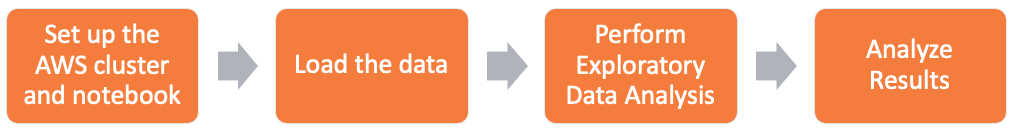


Each step is discussed in detail below.

**Step 1: Set up the AWS cluster**

The AWS cluster and jupyter notebook was set up using EMR 6.5 so we can utilize the most recent version of Pyspark. Figure 2 shows the screenshot of the cluster instance. 

<center><b>Figure 2: Screenshot of EMR cluster instance</b><center>

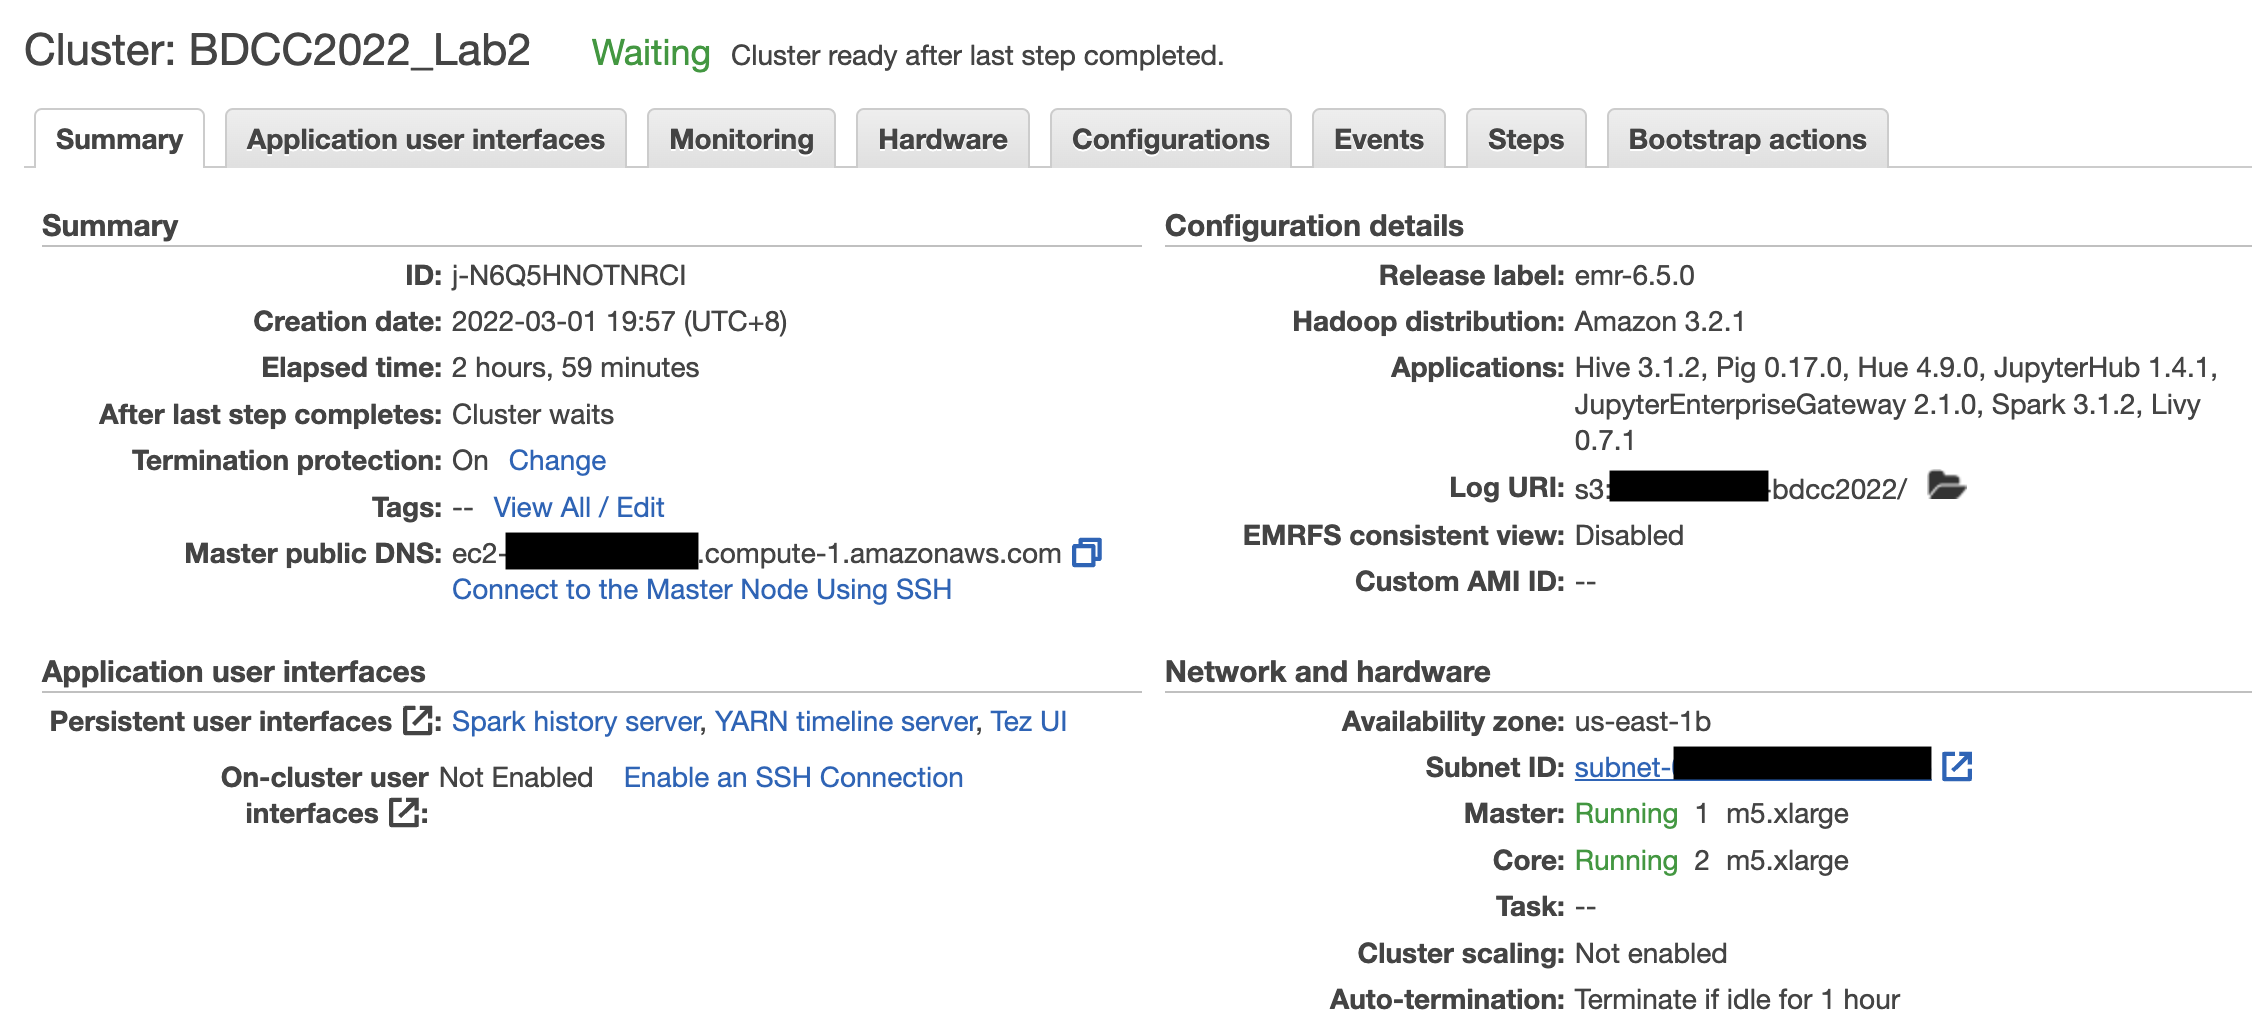

**Step 2: Load the data in PySpark**

The data was queried directly from the Amazon public repository in the EMR notebook. The data is available at `aws s3 ls --no-sign-request s3://amazon-pqa`.

The filesize of the dataset is 19.4 gb, as shown in the screenshot in the figure below. It may be noted that the command `!aws s3 ls --no-sign-request --human-readable --summarize --recursive s3://amazon-pqa` does not work on the Pyspark EMR notebook (perhaps because the AWS CLI is not installed in the cluster), so this had to be queried in a notebook in Jojie. 

<center><b>Figure 3: Filesize of the dataset</b><center>

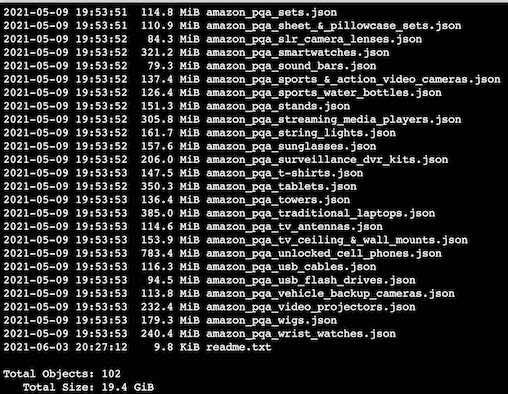

As can be seen from above, the dataset is composed of JSON files (one JSON file per product category, which were parsed as a Spark DataFrame. The schema of the files is shown below.

In [5]:
# install the necessary libraries in EMR PySpark cluster
#sc.install_pypi_package("pandas==0.25.1") #Install pandas version 0.25.1 
#sc.install_pypi_package("matplotlib==3.1.1")

# load the libraries
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 300)

# import the PySpark functions
from pyspark.sql import functions as F
from pyspark.sql.functions import *
from pyspark.sql.functions import explode, desc, input_file_name, col
import re

#Loading the data from public s3 bucket
df = spark.read.json("s3://amazon-pqa/*.json")
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- answer_aggregated: string (nullable = true)
 |-- answers: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- answer_text: string (nullable = true)
 |-- asin: string (nullable = true)
 |-- brand_name: string (nullable = true)
 |-- bullet_point1: string (nullable = true)
 |-- bullet_point2: string (nullable = true)
 |-- bullet_point3: string (nullable = true)
 |-- bullet_point4: string (nullable = true)
 |-- bullet_point5: string (nullable = true)
 |-- item_name: string (nullable = true)
 |-- product_description: string (nullable = true)
 |-- question_id: string (nullable = true)
 |-- question_text: string (nullable = true)
 |-- question_type: string (nullable = true)

This study used the `question_text` and `question_type` fields for analysis because the authors were interested on the type of questions that customers asked, and which product categories elicited more interest (i.e., more questions).

An example of the content of the JSON file is displayed below.

In [5]:
df.take(2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(answer_aggregated='N/A', answers=[Row(answer_text='Plastic')], asin='B009360BEW', brand_name='', bullet_point1='Use the Deck Washer to quickly clean your deck, driveway, sidewalk or garage', bullet_point2='The Deck Washer is easy to use -- just attach to a standard garden hose', bullet_point3='Built-in nozzles on the broom provide pressure washing while the bristles scrub embedded dirt', bullet_point4='', bullet_point5='', item_name='Deck Washer', product_description='Instead of sweeping off your deck and then hosing the grime away, do it all at once with the Deck Washer. Simply attach the Deck Washer\'s aluminum extension handle to your garden hose and wash away stubborn dirt and debris on your deck, patio or driveway. The 13  wide broom has stiff bristles for getting into cracks, plus 14 nozzles for maximum pressure cleaning. The Deck Washer is easy to operate with on/off knob on handle."', question_id='Tx3223771NA0J0W', question_text='Is the end where the garden hose attaches p

**Step 3: Perform Exploratory Data Analysis (EDA)**

EDA was performed to be able to generate summary statistics. Pyspark dataframe actions were used in this step to be able to generate the results. When applicable, plots and wordcloud were also generated to aid in the visualization.

**Step 4: Analyze the results**

The results of the EDA were analyzed to see if there are interesting insights that could be gleaned.

# <span style="background-color: #FF9900; color: #000000"> Data Exploration (EDA) </span>

## Descriptive Statistics

### Type of Questions Asked by Customers

The questions were categorized into two - `yes/no` and `WH`. `Yes/no` questions are answerable by yes or no, while `WH` questions are those introduced by wh-word (e.g. what, who, where, why) and requiring more information in reply than simply yes or no. It can be confirmed that there only two types of questions that is available in the dataset as can be seen in the result of the query below.

In [6]:
num_qtype = df.select('question_type').distinct().count()
print(f'Number of Question Type: {num_qtype:,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of Question Type: 2

### Product Categories and Brands

There are 100 categories coming from different products being handled by Amazon. These products varies from accessories, activity and fitness trackers, adapters, and a lot more. To be able to analyze the dataset according to the categories, the authors extracted the categories from the filename and added this to the Spark dataframe that will be used for analysis

In [6]:
# adding a filename column
from pyspark.sql.functions import input_file_name
df = df.withColumn('filename', input_file_name())
# print the number of categories
num_cat = df.select('filename').distinct().count()  
print(f'Number of Categories: {num_cat:,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of Categories: 100

Meanwhile, there are `21,832 brands` in the Amazon Products and Questions dataset. It may be noted that there are brands that may be present in different product categories.

In [9]:
# print the number of unique brand names
num_brandname = df.select('brand_name').distinct().count()
print(f'Number of Brand Names: {num_brandname:,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of Brand Names: 21,832

Of the `21,832 brands`, the most common brands are shown in the table below. The top brands that have the most number of question_ids are `Amazon` and the other tech brands such as `Samsung`, `ASUS`, `Sony`, `HP` and `Apple`. However, there are `5,313,314 queries` that do not have a brand. It is not surprising that Amazon has the most number of queries, since their flagship products like Kindle, Echo and Alexa can only be bought in Amazon.

**Table 3: Brand Names**

In [31]:
(df.select('filename', 'brand_name')
 .groupBy('brand_name').agg(F.count('brand_name').alias('Brands'))
 .orderBy(col('Brands').desc())
 .limit(20)
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+-------+
|    brand_name| Brands|
+--------------+-------+
|              |5313314|
|        Amazon| 267930|
|       Samsung| 142975|
|          ASUS| 110608|
|          Sony|  75024|
|            HP|  62835|
|         Apple|  53075|
|          Acer|  52974|
|         Zinus|  45439|
|           BLU|  43916|
|          Dell|  41980|
|           MSI|  41494|
|LG Electronics|  40975|
|     Panasonic|  35629|
|     Microsoft|  34231|
|          Roku|  31683|
|      Motorola|  30987|
|      Nintendo|  30004|
|        Lenovo|  29737|
|          Bose|  29146|
+--------------+-------+

The number of unique items of columns `answers`, `question_id`, `item_name`, and `product_description` are the same. This means that we can use any of these columns to analyze the count of the queries, and there is a one-to-one availability of product information, listed item name and answers to each posted question. There are `1,438,187` listed items along with the questions, answers, and product description in this dataset.

#### Number of Items

In [32]:
num_itemname = df.select('item_name').distinct().count()
print(f'Number of Items: {num_itemname:,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of Items: 1,438,187

#### Number of Answers

In [33]:
answers = df.select('answers').distinct().count()
print(f'Number of answers: {num_itemname:,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of answers: 1,438,187

#### Number of Questions

In [34]:
question_id = df.select('question_id').distinct().count()
print(f'Number of question_id: {num_itemname:,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of question_id: 1,438,187

#### Number of Product Description

In [35]:
product_description = df.select('product_description').distinct().count()
print(f'Number of product_description: {num_itemname:,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of product_description: 1,438,187

## Questions per Category

The number of questions per category is shown in Table 4 below. It may be noted that the products with the most number of questions were cellphones, cases and laptops.

**Table 4: Number of questions per Product Category**

In [7]:
# count the number of questions per product category
num_questions = (df.groupby(df['filename'])
      .count()
      .orderBy(desc('count'))
      .toPandas())

# rename the filename to only reflect the product category
num_questions.filename = (num_questions
                          .filename
                          .str
                          .replace(
                              r'(\w\d\W\W\Wamazon-pqa\Wamazon_pqa_)|.json', ''))
num_questions.rename(columns = {"filename":"Product Category"}, inplace = True)

# display the resulting dataframe
num_questions

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

           Product Category   count
0      unlocked_cell_phones  499539
1               basic_cases  370802
2         earbud_headphones  307820
3       traditional_laptops  291896
4                   tablets  245544
..                      ...     ...
95   vehicle_backup_cameras   49529
96         power_converters   49435
97               light_bars   48736
98           computer_cases   48436
99  sheet_&_pillowcase_sets   47578

[100 rows x 2 columns]

The graph below shows the share of the top 5 product categories with the most number of questions. As we can see the `unlocked_cell_phones` category had the most number of questions, followed by `basic_cases`, `earbud_headphones`, `traditional_laptops`, and `tablets`. Each category comprises of 17% to 30% of the number of questions asked. Users are usually discerning when it comes to purchases of cellphones because it has to conform to their needs and wants, and its peripheries like cases and headphones are version-sensitive, meaning it has to match the type/model/size of your cellphone.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

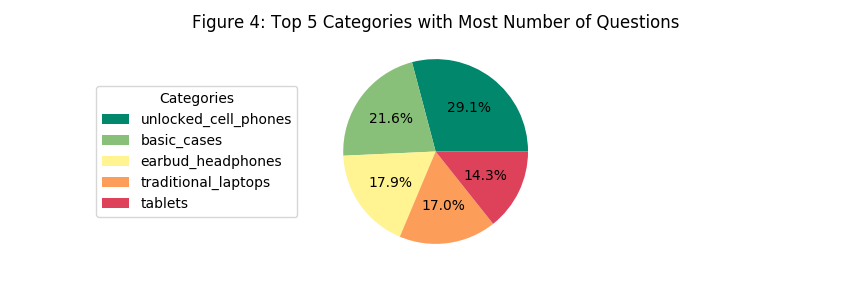

In [39]:
num_questions = num_questions.head(5)
plt.clf()
labels = [f"{num_questions}" for num_questions in num_questions['Product Category']]
queries = [num for num in num_questions['count']]
colors = ['#00876c', '#89c079', '#fff392', '#fc9e5a', '#de425b']
fig, ax = plt.subplots(figsize=(8.5,3))
w,a,b = ax.pie(queries, autopct='%1.1f%%', colors=colors)
plt.title('Figure 4: Top 5 Categories with Most Number of Questions')
ax.legend(w, labels, title="Categories", loc="center left", bbox_to_anchor=(-1, 0, 0.5, 1))
%matplot plt

## Type of Questions Asked

As we can see in the bar graph below, more questions were answerable by yes/no than WH type questions. WH type questions are questions introduced by a wh-word (e.g. what, why, where). We can infer that most questions asked by the users/customers are confirmatory questions. This poses an interesting opportunity for retailers since they could extract the type of questions and make FAQs to augment the product description of their listed products.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

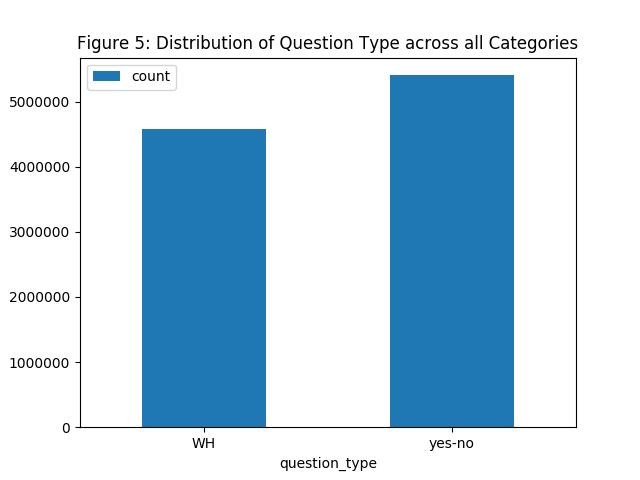

In [40]:
question_type_dist = df.groupBy('question_type').count().orderBy('count').toPandas()
question_type_dist.plot.bar(x='question_type', y='count', rot=0)
plt.title('Figure 5: Distribution of Question Type across all Categories')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

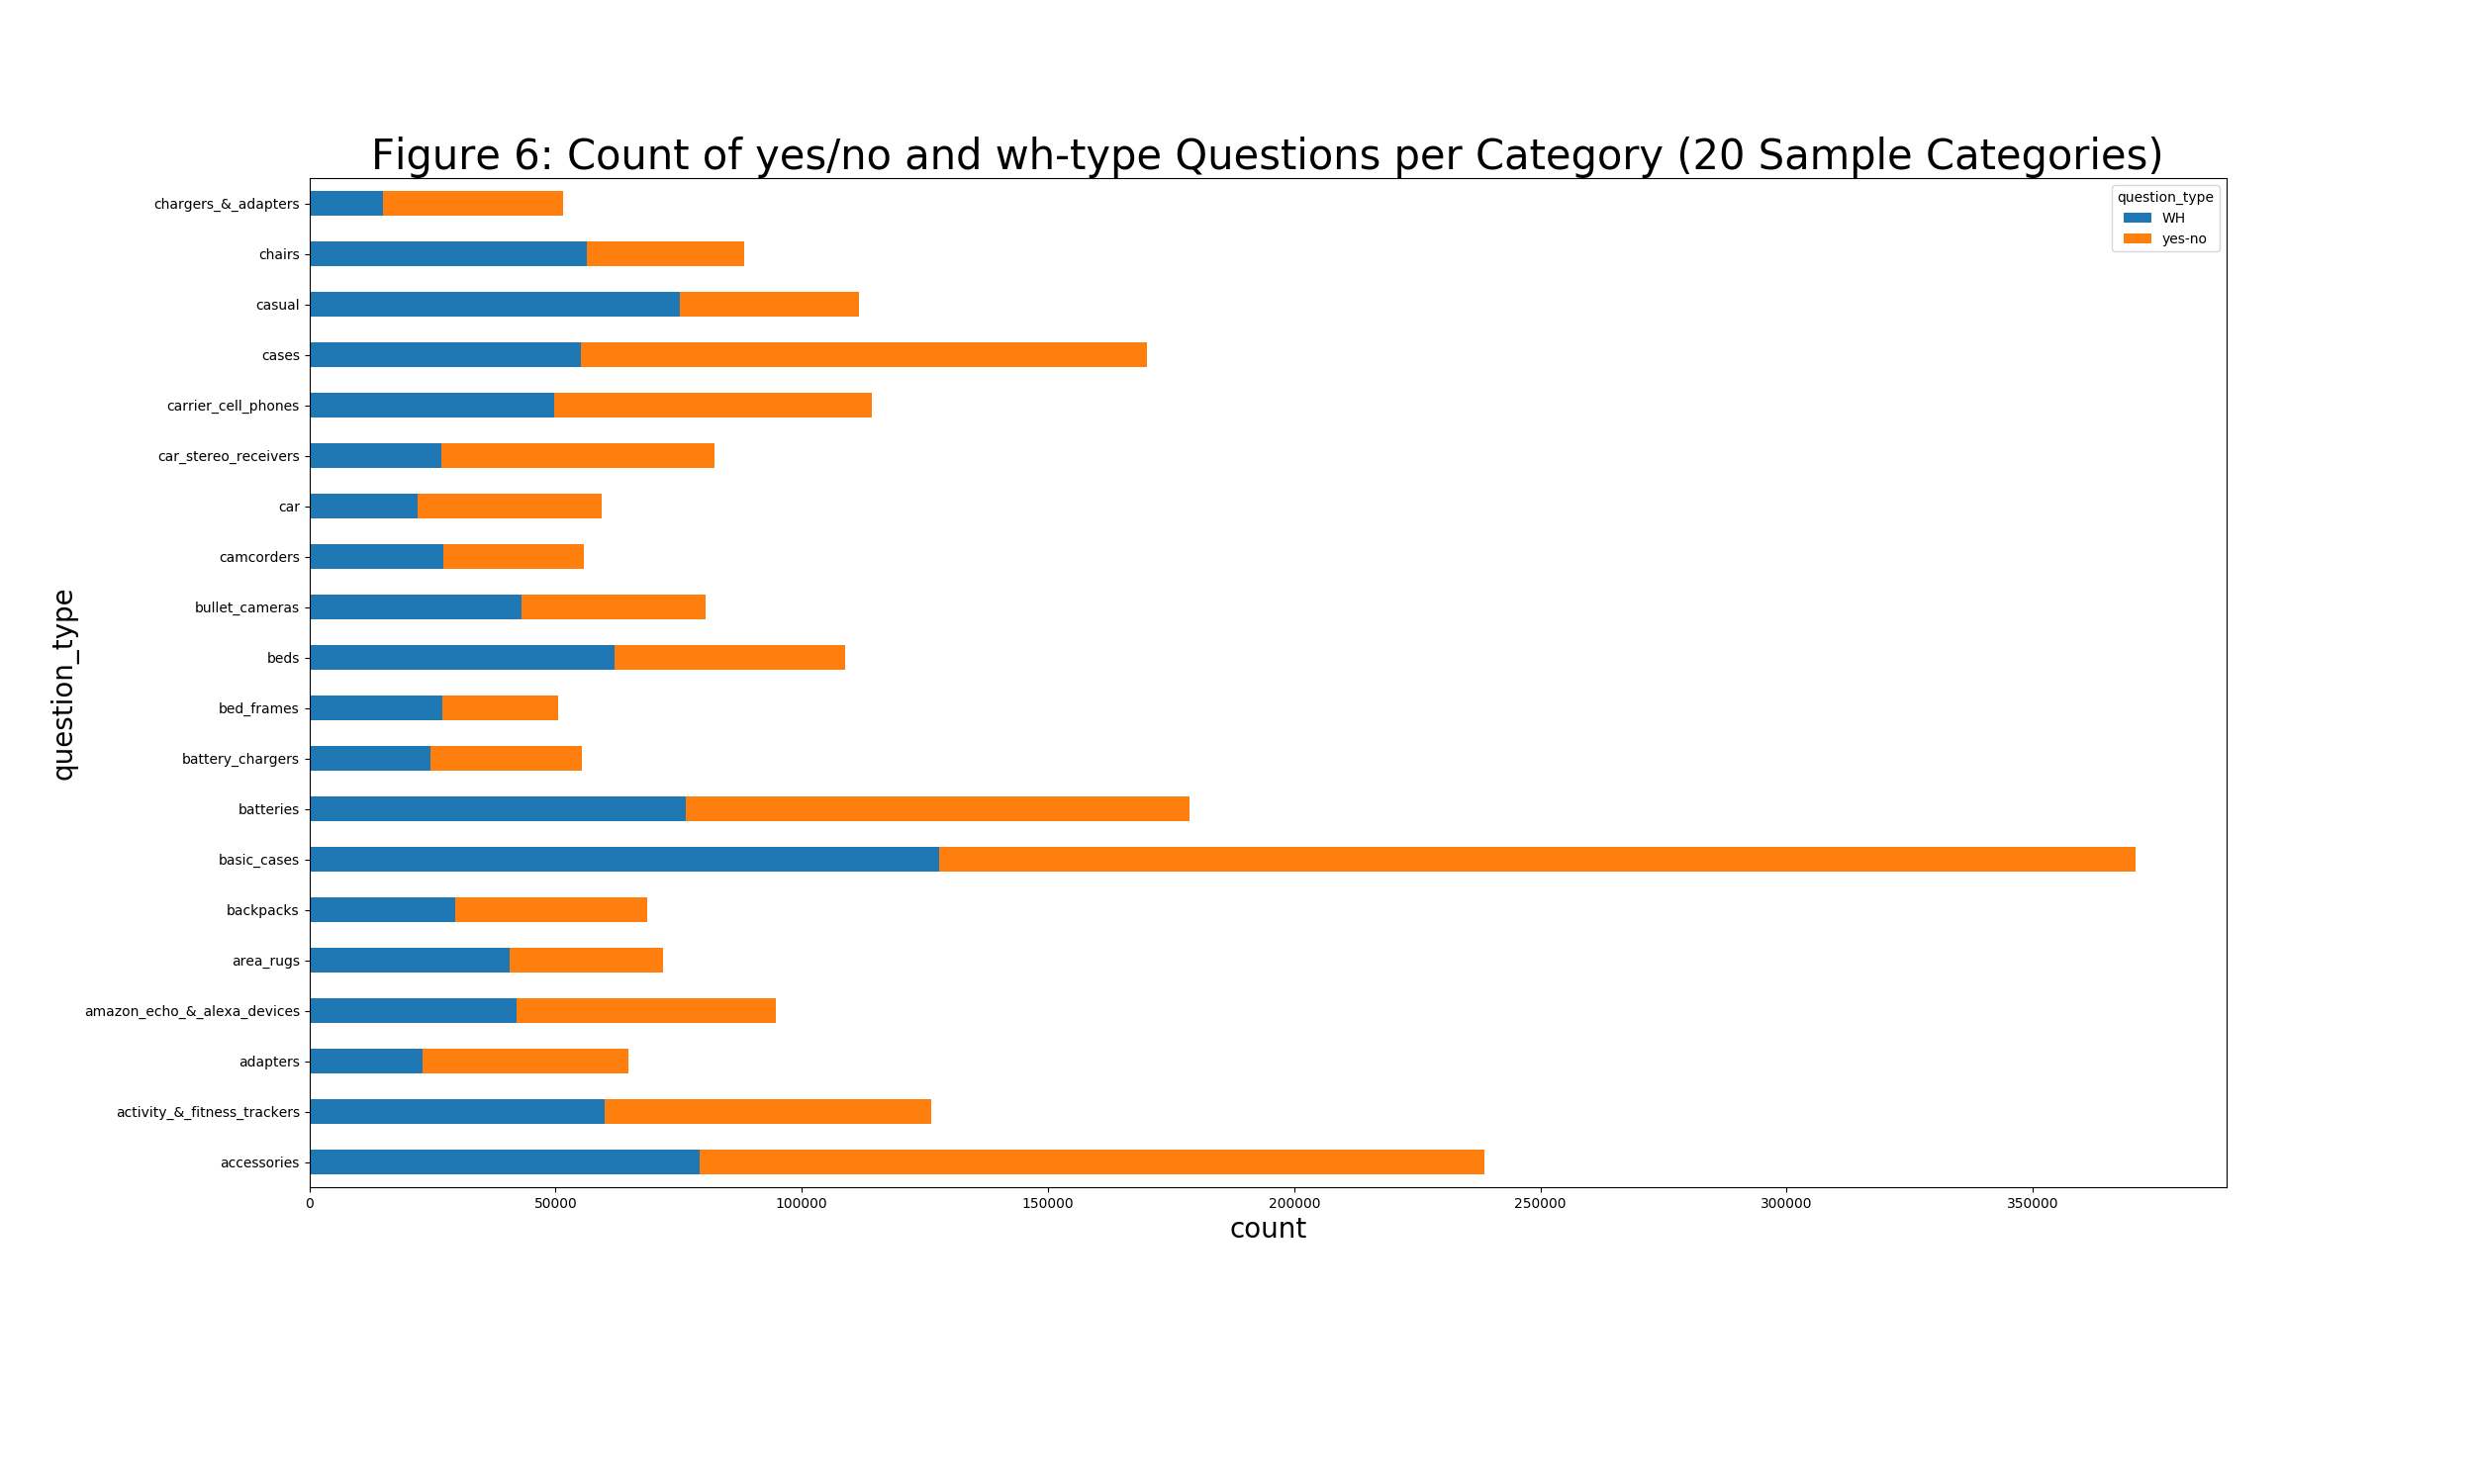

In [8]:
question_type_dist = df.groupBy('filename', 'question_type').count().orderBy('filename', 'question_type')

question_type_dist = question_type_dist.toPandas()

question_type_dist.filename = (question_type_dist
                          .filename
                          .str
                          .replace(
                              r'(\w\d\W\W\Wamazon-pqa\Wamazon_pqa_)|.json', ''))
question_type_dist.rename(columns = {"filename":"Product_Category"}, inplace = True)

# plot the counnt of yes/no and wh per category
plt.clf()
pivot_df = question_type_dist.head(40).pivot(index= 'Product_Category', columns='question_type', values='count')
pivot_df.plot.barh(stacked=True, figsize=(25,15))
plt.title('Figure 6: Count of yes/no and wh-type Questions per Category (20 Sample Categories)', fontsize=30)
plt.xlabel('count',fontsize=20)
plt.ylabel('question_type',fontsize=20)
plt.subplots_adjust(bottom=0.2)
%matplot plt

The figure above shows the distribution of yes/no and WH questions per category. It can be seen that the yes/no questions dominate almost all categories, with `basic cases`, `accessories` and `cases`. These are the categories that can benefit from better product description and an FAQ to address queries of consumers.

## Number of words in a query

It is also interesting to see the number of words in a query. The authors' initial hypothesis was that the number of words in a query would denote interest or complexity of the question, and would warrant more resources to answer. The result of the table below shows that a food storage item has 13,874 words in a question!

It may be noted that in this section, the number of words is used as a proxy metric to denote interest/ engagement in conversation. The higher the number of words, the higher the engagement.

**Table 5: Top Categories and Item with Most Word Wount in Query**

In [55]:
# max of the number of words in a query

(df.select('filename', size(split('question_text', " ")))
 .withColumn('filename', regexp_replace('filename', r'(\w\d\W\W\Wamazon-pqa\Wamazon_pqa_)|.json', ''))
 .withColumnRenamed('size(split(question_text,  , -1))','ask_wordcount')
 .groupBy('filename').agg({'ask_wordcount':'max'})
 .orderBy(col('max(ask_wordcount)').desc())
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|            filename|max(ask_wordcount)|
+--------------------+------------------+
|food_storage_&_or...|             13874|
|    posters_&_prints|             12580|
|            adapters|              9945|
|external_hard_drives|              6269|
|   screen_protectors|              5934|
|                sets|              4884|
|           keyboards|              4122|
|            costumes|              3799|
|         basic_cases|              3732|
|             cradles|              3532|
|quadcopters_&_mul...|              2982|
|        gun_holsters|              2638|
|          mattresses|              2077|
|          light_bars|              1963|
|home_security_sys...|              1826|
|               cases|              1807|
|unlocked_cell_phones|              1788|
|               pumps|              1634|
|               jeans|              1253|
|           batteries|              1243|
+--------------------+------------

To further inspect the this result, the dataframe was expanded to show the question asked and the specific item that garnered this most number of words.

**Table 6: Top Categories and Item with Most Word Count in Query**

In [9]:
# make a udf to be able to split the queries in the column question_text

def splitAndCountUdf(x):
    """Returns a UDF that counts the words in a sparkDF row"""
    return len(x.split(" "))

countWords = F.udf(splitAndCountUdf, 'int')

# count the number of words in question_text

df_wordcount = (df.withColumn("count", countWords(df.question_text))
                .select('filename', 'item_name', 'question_text', 'count')
                .withColumn('filename',
                            regexp_replace('filename',
                                           r'(\w\d\W\W\Wamazon-pqa\Wamazon_pqa_)|.json', ''))
                .orderBy(col('count').desc()))

df_wordcount.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+-----+
|            filename|           item_name|       question_text|count|
+--------------------+--------------------+--------------------+-----+
|food_storage_&_or...|[5-Packs, 36 Oz.]...|If these are the ...|13874|
|    posters_&_prints|THE SPONGEBOB MOV...|can this be used ...|12580|
|            adapters|International Pow...|4.1 x 2.8 x 0.7 i...| 9945|
|external_hard_drives|Seagate Desktop 8...|Can i put two par...| 6269|
|   screen_protectors|(3 Pack) Supershi...|Will this item fi...| 5934|
|                sets|Cupshe Fashion Wo...|I'm a 36 c and i ...| 4884|
|           keyboards|iClever BK10 Blue...|Some of my keys a...| 4122|
|            costumes|Betty Boop Starle...|Would it fit for ...| 3799|
|         basic_cases|Huakay iPhone 11 ...|Is this well sewn...| 3732|
|         basic_cases|Alcatel One Touch...|will this case fi...| 3540|
|             cradles|WixGear Universal...|Can I detach the ...| 3532|
|quadc

Looking closer at the specific item that has the most number of words, the authors inspected what is the content of the query with 13,874 words. Inspection showed that this field also captured the reply of the seller and follow up questions. Hence, some items in the `question_text` field are conversational, but unfortunately the dataset has no tag on whether the query has been resolved or has been answered satisfactorily.

The word cloud below shows the most frequently occuring word in the query. It can be seen that  `food storage`, `containers`, `borosilicate glass`, `airtight` and `dishwasher safe` were among the queries for this specific product. Hence, the seller of this item could put these product features in the product listing, or make an FAQ to address customer concerns.

In [49]:
# load a dataframe for the food and storage dataset

df_food = (spark.read.json("s3://amazon-pqa/amazon_pqa_food_storage_&_organization_sets.json")
           .withColumn('filename', input_file_name()))

# get the text in the question_text field to make wordcloud
# note: wordcloud was made in python because the pyspark kernel is not compatible with wordcloud

food_query = (df_food.withColumn("count", countWords(df_food.question_text))
 .select('question_text')
 .orderBy(col('count').desc())
 .limit(1)
).write.csv('foodquery.csv')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<center><b>Figure 7: Word Cloud of Most Number of Words in a Product Query</b><center>
    
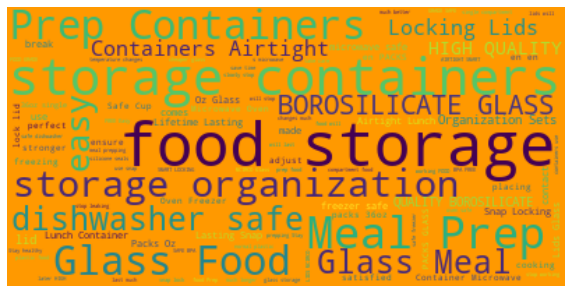

### Top Brands Asked About

The authors first wanted to dig deeper on what are the brands and their specific product that elicited the most number of words in a query. This is interesting because the higher the number of words, the more active the conversation was. We are using the count of the individual words as a proxy metric for engagement. As can be seen from the table below, `Seagate`, `Wizgear` and `BLACKHAWK!` are the brands that had the most number of words in the customer questions.

**Table 7: Top Brands with the Most Word Count in a Query**


In [104]:
# display the most number of words in an individual query
top_brand = (df.select('filename', 'brand_name', 'item_name', 'question_text', 'answers')
             .withColumn('filename',
                         regexp_replace('filename',
                                        r'(\w\d\W\W\Wamazon-pqa\Wamazon_pqa_)|.json', ''))
             .withColumn('brandname_len', F.length('brand_name').cast('int'))
             .filter(col('brandname_len') > 0)
             .withColumn("count", countWords(df.question_text))
             .orderBy(col('count').desc())
             .select('filename', 'brand_name', 'item_name', 'question_text', 'answers', 'count')
             .limit(10)
            )

top_brand.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+--------------------+--------------------+--------------------+-----+
|            filename|        brand_name|           item_name|       question_text|             answers|count|
+--------------------+------------------+--------------------+--------------------+--------------------+-----+
|external_hard_drives|           Seagate|Seagate Desktop 8...|Can i put two par...|[{U plug them bot...| 6269|
|             cradles|           WizGear|WixGear Universal...|Can I detach the ...|[{no I don't thin...| 3532|
|        gun_holsters|        BLACKHAWK!|BLACKHAWK! SERPA ...|what size for a k...|[{The Colt Govern...| 2638|
|          mattresses|             Zinus|Zinus 12 Inch Gel...|We purchased this...|[{The height or t...| 2077|
|          light_bars|           Nilight|Nilight 15Inch Tr...|What side is the ...|    [{It will work}]| 1963|
|          light_bars|           Nilight|LED Light Bar Nil...|Wiring harness fo...|              [{No}]| 1690|
|

In [113]:
# get the dataframe for seagate external hard drive
df_sg = (spark.read.json("s3://amazon-pqa/amazon_pqa_external_hard_drives.json")
         .withColumn('filename', input_file_name()))

#write to csv for wordcloud
(df_sg.select('brand_name', 'question_text')
 .withColumn("count", countWords(df_sg.question_text))
 .filter(col('brand_name') == 'Seagate')
 .orderBy(col('count').desc())
 .limit(1)
 .select('question_text')
).write.csv('seagate.csv')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Looking closer at the words in the query for seagate, we see that this is product related, asking about the type of hard drive, type of plug, the operating system (Windows), offers, and external hard drives.

<center><b>Figure 8: Word Cloud of Seagate Brand Query</b><center>
    
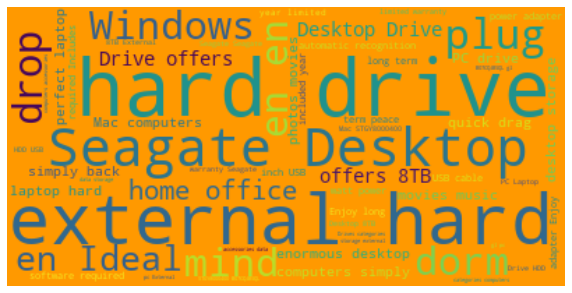


It was also interesting to see the total number of words in the queries for all the brands in the database. The brands with the most number of queries also got the most number of words per query, which were Amazon, Samsung and ASUS.

**Table 8: Top Brands With the Most Word Count in All Queries**

In [98]:
# display the total number of words in the query for top brands
brand_count = (df.select('filename', 'brand_name', 'question_text', 'answers')
               .withColumn('filename',
                         regexp_replace('filename',
                                        r'(\w\d\W\W\Wamazon-pqa\Wamazon_pqa_)|.json', ''))
               .withColumn('brandname_len', F.length('brand_name').cast('int'))
               .filter(col('brandname_len') > 0)
               .withColumn("count", countWords(df.question_text))
               .select('brand_name', 'count')
               .groupBy('brand_name').sum('count')
               .withColumnRenamed('sum(count)', 'total_words_all_queries')
               .orderBy(col('total_words_all_queries').desc())
               .limit(10)
              )

brand_count.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+-----------------------+
|    brand_name|total_words_all_queries|
+--------------+-----------------------+
|        Amazon|                3461174|
|       Samsung|                1670667|
|          ASUS|                1381119|
|          Sony|                 970976|
|            HP|                 696852|
|          Acer|                 629576|
|         Zinus|                 613334|
|         Apple|                 549489|
|LG Electronics|                 515650|
|           MSI|                 513985|
+--------------+-----------------------+

In [128]:
#write to csv for wordcloud
(df.select('brand_name', 'question_text')
 .withColumn("count", countWords(df.question_text))
 .filter(col('brand_name') == 'Amazon')
 .orderBy(col('count').desc())
 .limit(1)
 .select('question_text')
).write.csv('amazon_cat.csv')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Looking at the top brand, Amazon, we see that the queries were about Alexa, Amazon related content, music, Echo, video, audible, audiobooks, voice and bluetooth.

<center><b>Figure 9: Word Cloud of Amazon Brand Query</b><center>

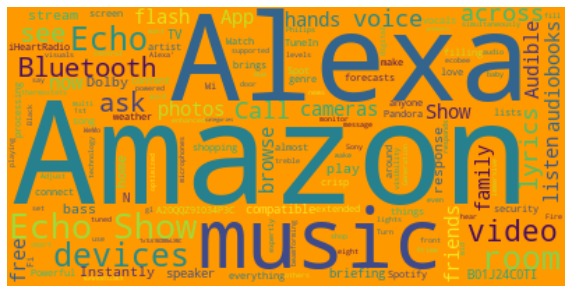

### Top Categories Asked About

We do the same for the categories. We looked at the count of words in the questions for all the categories in the dataset. 

It may be noted that we did not filter for unique words since this is not a topic modelling problem. We are interested to see the number of words as a metric for engagement and active conversation.

**Table 9: Top Categories With the Most Word Count in All Queries**

In [108]:
# display the total number of words in the query for top brands
cat_count = (df.select('filename', 'brand_name', 'question_text', 'answers')
             .withColumn('filename',
                         regexp_replace('filename',
                                        r'(\w\d\W\W\Wamazon-pqa\Wamazon_pqa_)|.json', ''))
             .withColumn('brandname_len', F.length('brand_name').cast('int'))
             .filter(col('brandname_len') > 0)
             .withColumn("count", countWords(df.question_text))
             .select('filename', 'count')
             .groupBy('filename').sum('count')
             .withColumnRenamed('sum(count)', 'total_words_all_queries')
             .withColumnRenamed('filename', 'product_categories') 
             .orderBy(col('total_words_all_queries').desc())
             .limit(10))

cat_count.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------------+
|  product_categories|total_words_all_queries|
+--------------------+-----------------------+
| traditional_laptops|                2115123|
|unlocked_cell_phones|                2041572|
|             tablets|                1988845|
|streaming_media_p...|                1972336|
|               games|                1824000|
|            monitors|                1680895|
|       led_&_lcd_tvs|                1589156|
|   earbud_headphones|                1570815|
|portable_bluetoot...|                1392670|
|         basic_cases|                1204877|
+--------------------+-----------------------+

In [134]:
# get the dataframe for seagate external hard drive
df_lp = (spark.read.json("s3://amazon-pqa/amazon_pqa_traditional_laptops.json")
         .withColumn('filename', input_file_name()))

#write to csv for wordcloud
(df_lp.select('brand_name', 'question_text')
 .withColumn("count", countWords(df_lp.question_text))
 .orderBy(col('count').desc())
 .limit(1)
 .select('question_text')
).write.csv('laptop.csv')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

It can be seen in the figure below that the most common words in the query of traditional laptop is Toshiba, Office (probably referring to Microsoft Office), HP, Chromebook and Intel.

<center><b>Figure 10: Word Cloud of Traditional Laptops Category Query</b><center>
    
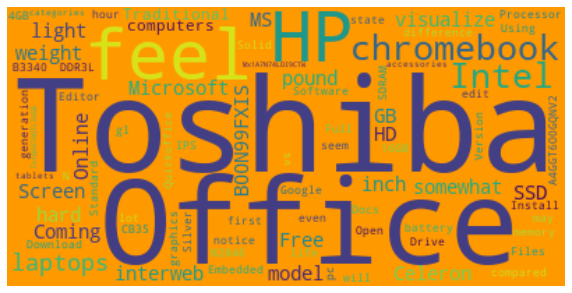

# <span style="background-color: #FF9900; color: #000000"> Results and Discussion </span>

The EDA was mainly on the descriptive statistics on the questions for the different products, brands and question types in the amazon product question and answer database. It is to explore what possible methodologies we can offer to process the dataset. During the exploration methodology, some interesting insights were uncovered.

**Top Brands**

It was seen from the EDA that the brands with the most number of questions posted were electronic products such as `Amazon`, `Samsung`, `Asus`, `Sony` and `HP`. These brands are familiar to most people. It was not a surprise that these brands emerge as the top brands with the most engagements, with questions and answers being posted as the basis. It can be inferred that most people patronize these brands and are interested or have already bought their products. It would be beneficial for these companies to employ NLP in the analysis of the posted questions to further improve their product's instruction manual or labels. These questions may also be an opportunity for these brands to get a glimpse on what the market is expecting and demanding. By analyzing the questions and answers posted in this platform, these top brands can leverage on the marketing perspective or on the technical features of their upcoming products.

**Top Categories**

The categories that had the most number of questions were `unlocked_cell_phones`, `basic_cases`, `earbud_headphones`, `traditional_laptops` and `tablets`, which are all electronic gadgets. It can be inferred that most users are really asking some questions before purchasing or even after purchasing electronic gadgets. Gadgets do come with instruction manuals, but who reads those pieces of papers with tiny fonts. Most users in the category of electronic gadgets find it more convenient to just go online and ask away. The brands of these gadgets can get solid insights that they can consider including in their packaging labels and marketing mediums. One example is to look for the most common questions being asked across all brands and make a frequently asked questions (FAQ) list. This will bring more convenience to the customers as they will just scroll on the list of FAQs to find their common questions. Another thing is that there will be sentiments from the questions that the electronic gadgets might learn. For instance, they can get insight on what features of the gadgets are mostly being engaged and that the public is interested. They can plan to improve on those features like cameras on mobile phones.

**Top Type of Question**

Most of the questions were yes-no format questions, which are answerable by `yes or no`.  It can be inferred that most questions raised by the users are just confirmatory questions whether the product works this way or not. The other question format is `wh` type questions. These questions are those that start with `wh` like where, what, why, who. These questions seek to answer with reasons rather than confirming with a yes or no. This signals that the opportunity is ripe for making a simple FAQ that can address the most common questions for these products. Moreover, this may give a glimpse that consumers just want simple answers, and would want to optimize their questions to get the best response that will augment their personal justifications in buying a product. 

This begs the question, ***what can be done with this information***? The Amazon PQA database was primarily used for a question-answering problem. This information can `help brands identify what are the top questions that are being asked about their products`. From this knowledge, they can `craft better ways to deliver product information` - be it in the form of a more comprehensive product description, video on usage, links to relevant websites or FAQs. Amazon can also use this information to `provide a chatbot service to the sellers who use the platform` for an additional fee, given the rich corpora of text information between questions and answers of buyers and users. Moreover, Amazon already has the platform to process this big data in the form of AWS, and this study was able to leverage on that infrastructure to make this preliminary analysis.

# <span style="background-color: #FF9900; color: #000000"> Conclusions </span>

Question and answer is an emerging area of research. An introduction in this area of research is uncovering interesting insights from the questions and answers for products and product categories in the amazon-pqa database.

`Big data and its processing can be complex` since it needs a different medium for analysis that we are used to - in this particular case, AWS EMR. The lessons the authors learned in this study goes beyond the descriptive statistics generated, but also in the methodology of making the cluster and notebooks work, `understanding the dependencies between the versions of the different programs` and working with Big Data.

This study showed the `recent trend in society that consumers are focused on gadgets` such as cellphones, laptops and tablets, including their accessories. The purchase of these electronic goods are also done in an electronic platform such as Amazon. The `interaction between the sellers and the buyers are very rich`, as can be noted from the number of words that are present in the queries.

The analysis unearthed in this study can `help brands identify what are the top questions that are being asked about their products`. From this knowledge, they can `craft better ways to deliver product information` - be it in the form of a more comprehensive product description, video on usage, links to relevant websites or FAQs. Amazon can also use this information to `provide a chatbot service to the sellers who use the platform` 


# <span style="background-color: #FF9900; color: #000000"> Recommendations for Further Study </span>

The following are the recommendations for further study.

1. **Clean the question and answer data**. In this study, the count of the non-unique words in a query was considered a proxy for activity and engagement between buyers and sellers. Cleaning the data by removing stopwords, removing characters and accounting for formatting errors (e.g. capitalization, misspelling) could improve the analysis and usability of the dataset.



2. **Explore the use of SparkNLP**. This study focused solely on EDA. Explore performing natural language processing techniques such as topic modeling using SVD or NMF and how SparkNLP can be leveraged for big data concerning text data can be useful for future research. This could help advance current research on the use RNN or advanced neural network architectures for question answering techniques.



3. **Explore the use of other AWS services in processing big data**. Amazon sagemaker can be explored as a baseline preparatory step in processing the data to see how well Amazon’s suite of products for machine learning and data processing can help data scientists perform analysis quickly.



# <span style="background-color: #FF9900; color: #000000"> References </span>

Amazon Open Datasets. https://registry.opendata.aws/amazon-pqa/

Guevarra, L. M. (2021). E-commerce: The Past, Present, and Future. Spiralytics Inc. https://www.spiralytics.com/blog/past-present-future-ecommerce/

Carmel ,D. , Mejer, A.,  Mirkis, V. (2021).. Answering product questions by utilizing questions from other contextually similar products. https://www.amazon.science/publications/answering-product-questions-by-utilizing-questions-from-other-contextually-similar-products

Adamopolou, A.,  Moussiades, L. (2020). Chatbots: History, technology, and applications. https://www.sciencedirect.com/science/article/pii/S2666827020300062 
